In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from globalVariables import *

In [11]:
from augmentData import augmentData

In [15]:
from mainModel import mainModel
import yaml, h5py

In [25]:
    iMonte=0
    testTrainSplit=0.15
    
    (train_images, att_train, train_labels), testSets = getData( binning=20, testTrainSplit=testTrainSplit,  \
                           indexFileRoot='pickles/testIndexes_%i' % (iMonte))

    test_labels, test_images = None, None
    for i in testSets.keys():
        if test_labels is None:
            test_images = testSets[i]['images']
            test_labels = testSets[i]['labels']
        else:
            test_labels = np.vstack((test_labels, testSets[i]['labels']))
            test_images = np.vstack((test_images, testSets[i]['images']))

1200
nTests is 180
1200
nTests is 180
1200
nTests is 180
1200
nTests is 180


In [22]:
train, labels = augmentData( train_images, train_labels)

In [23]:
train.shape

(61200, 100, 100, 2)

In [13]:
mertensModel.evaluate( test_images, test_labels)

23/23 [==============================] - 49s 2s/step - loss: 1.0231 - accuracy: 0.5491


[1.0230653285980225, 0.5491009950637817]

In [18]:
prediction[test_labels[:,0]==i]

array([0, 1, 1, 1, 2, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1])

1200
nTests is 180
1200
nTests is 180
1200
nTests is 180
1200
nTests is 180
1200
nTests is 180
1200
nTests is 180


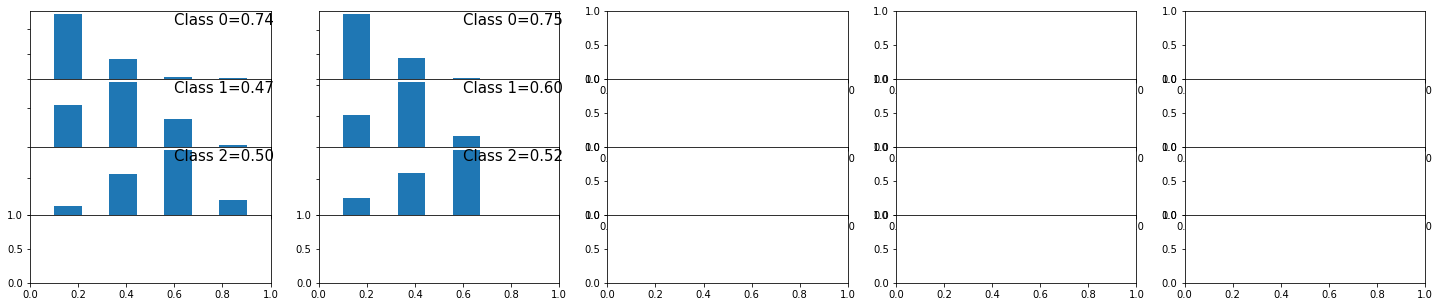

In [6]:
fig, ax = plt.subplots(4,5, figsize=(25,5))

for iMonte in range(2):
    
    testTrainSplit=0.15
    
    (train_images, att_train, train_labels), testSets = getData( binning=20, testTrainSplit=testTrainSplit,  \
                           indexFileRoot='pickles/testIndexes_%i' % (iMonte), nChannels=iMonte+1,\
                                                                models=['CDM','SIDM0.1','SIDM0.3'])

    test_labels, test_images = None, None
    for i in testSets.keys():
        if test_labels is None:
            test_images = testSets[i]['images']
            test_labels = testSets[i]['labels']
        else:
            test_labels = np.vstack((test_labels, testSets[i]['labels']))
            test_images = np.vstack((test_images, testSets[i]['images']))

        
    mertensModel = models.load_model("pickles/augmentedTrain_%i_channel_noAtt_dropout_0.2_testSplit_0.150_0.h5" % (iMonte+1))

    prediction = np.argmax(mertensModel.predict(test_images),axis=1)

    for axis, i in enumerate(np.unique(test_labels)):
        ax[axis, iMonte].hist(prediction[test_labels[:,0]==i], bins=np.linspace(-0.5,3.5,8), density=True)
        ax[axis, iMonte].set_xlim(-1,4)
        acc = np.where(prediction[test_labels[:,0]==i]==i)[0].shape[0]/prediction[test_labels[:,0]==i].shape[0]
        ax[axis, iMonte].text(0.6, 0.8, "Class %i=%0.2f" % (i,acc), transform=ax[axis,iMonte].transAxes, fontsize=15)
        if i != len(ax)-1:
            ax[axis, iMonte].set_xticklabels([])
            ax[axis, iMonte].set_yticklabels([])
    
fig.subplots_adjust(hspace=0)

In [ ]:
epoch, accuracy, loss, val_accuracy, val_loss = \
    np.loadtxt( "pickles/mertensModel_dropout_0.2_testSplit_0.1_1.csv", delimiter=',',skiprows=1,unpack=True)

In [ ]:
plt.plot(epoch,loss)
plt.plot(epoch,val_loss)
plt.plot(epoch,accuracy)
plt.plot(epoch,val_accuracy)
plt.ylim(0,1)

In [ ]:
prediction = mertensModel.predict(test_images)

In [ ]:
allPrediction  = np.argmax( prediction, axis=1)

In [ ]:
fig, ax = plt.subplots(4,1)
cross = np.array([0., 0.1, 0.3, 1.0])
labels = np.arange(4)+1
for axis, i in enumerate(cross):
    
    
    ax[axis].hist(allPrediction[test_labels[:,0]==axis], bins=np.linspace(-0.5,3.5,5))
    ax[axis].set_xlim(-1,5.)
    print(len(allPrediction[test_labels[:,0]==axis][allPrediction[test_labels[:,0]==axis] == axis]))

In [ ]:
#Add a dense layer for regression to the model
inputLayerFromCNN = Input(shape=mertensModel.output.shape)
regressorLayer = layers.BatchNormalization()(inputLayerFromCNN)
regressorLayer = layers.Dense(128)(regressorLayer)
regressorLayer = layers.BatchNormalization()(regressorLayer)
regressorLayer = layers.Dense(1)(regressorLayer)
finalModel = Model(inputLayerFromCNN, regressorLayer, name='regressorLayer')
finalModel.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001, centered=True),
              loss=['mean_squared_error'])

In [ ]:
trainPredictions = mertensModel.predict(train_images)

In [ ]:
shiftedPredictions = trainPredictions - np.min(trainPredictions, axis=1)[:,np.newaxis]
normedTrainPredictions = shiftedPredictions / np.sum(shiftedPredictions, axis=1)[:,np.newaxis]

In [ ]:
train_labels[ train_labels==0] = 0
train_labels[ train_labels==1] = 0.1
train_labels[ train_labels==2] = 0.3
train_labels[ train_labels==3] = 1.


In [ ]:
test_labels[ test_labels==0] = 0
test_labels[ test_labels==1] = 0.1
test_labels[ test_labels==2] = 0.3
test_labels[ test_labels==3] = 1.

In [ ]:
inceptionHistory = finalModel.fit(trainPredictions[:,np.newaxis,:], 
          train_labels,  
          epochs=100, validation_data=(prediction[:,np.newaxis,:], test_labels ))

In [ ]:
plt.plot(inceptionHistory.history['loss'])
plt.plot(inceptionHistory.history['val_loss'])

In [ ]:
regression = finalModel.predict(prediction[:,np.newaxis,:] )

In [ ]:
fig, ax = plt.subplots(4,1)
cross = np.array([0., 0.1, 0.3, 1.0])
labels = np.arange(4)+1
for axis, i in enumerate(cross):
    y, x = np.histogram(regression[test_labels[:,0]==i,0,0], bins=np.linspace(-1.5,5.5,100), density=True)
    xc = (x[1:] + x[:-1])/2.
    ax[axis].plot( xc, y)
    ax[axis].plot( [i,i],[0,1])
    ax[axis].set_xlim(-1,2.)


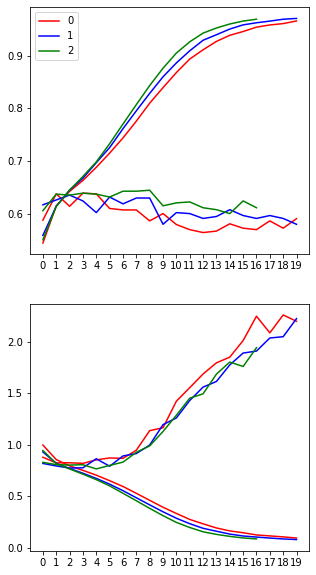

In [12]:
color = ['r','b','g','c','orange']
fig, axarr = plt.subplots( 2,1, figsize=(5,10))
for i in range(3):
    csvLogger = "pickles/augmentedTrain_%i_channel_noAtt_dropout_0.2_testSplit_0.150_0.csv" % (i+1)
    csvFile = np.loadtxt( csvLogger, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
    
   # plt.plot(csvFile['epoch'], csvFile['val_loss'], color=color[i])
    axarr[0].plot(csvFile['epoch'], csvFile['val_accuracy'], color=color[i], label=i)
    axarr[0].plot(csvFile['epoch'], csvFile['accuracy'], color=color[i])
    axarr[1].plot(csvFile['epoch'], csvFile['val_loss'], color=color[i])
    axarr[1].plot(csvFile['epoch'], csvFile['loss'], color=color[i])
axarr[0].legend()
